<a href="https://colab.research.google.com/github/Rerzd/Ciencia_Datos_intro/blob/main/datasets_10_03_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajando con medidas centrales
###1. como analizar dataframes
###2. Overview de los datos
###3. obtener medidas centrales
###4. Anlizar graficas


In [ ]:
!pip install statsmodels

In [ ]:
!pip install wquantiles

#1. Analizando dataframes

In [3]:
# vamos a importar todo lo que es importable ps
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
katzen = pd.read_csv('/content/state.csv')

In [ ]:
# ver los primeros 5 registros
katzen.head()

In [ ]:
#ver los ultimos 4 resultados
katzen.tail()

In [ ]:
# ver muestreo de 10 registros a la de cristo
katzen.sample(10)

#2. Overview de los datos

In [ ]:
katzen.columns

In [ ]:
list(katzen.columns) #convertir en listas los nombres de las columnas

In [ ]:
katzen.info #Conoce la existencia de datos nulos (Nan)

In [ ]:
katzen.describe #Te muestra los datos estadísticos de interés

##2.1 Estimado las tasas de población y asesinatos

In [18]:
katzen["Population"].mean() #reflexión tras 10 mins buscando error: observa las mayusculas

6162876.3

In [19]:
trim_mean(katzen["Population"], 0.1)

4783697.125

In [20]:
#media ponderada de asesinatos
np.average(katzen["Murder.Rate"], weights = katzen["Population"])

4.445833981123393

<Axes: >

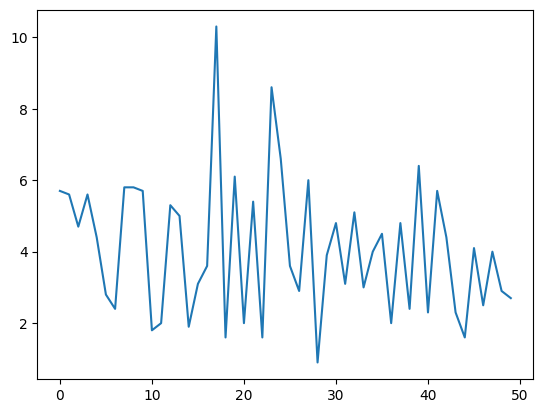

In [24]:
katzen["Murder.Rate"]. plot.line()

In [ ]:
katzen["Murder.Rate"]. plot.bar(color = "darkred")

In [ ]:
ax = (katzen.Population/1_000_000).plot.hist(color = "darkred", figsize=(8,5)) #dividir poblacion / Dar color / ajustar tamaño de barras
ax.set_xlabel("Population [Millions]") #Eje X
ax.set_ylabel("Cats Population") #Eje y
ax.set_title("Average american") #Titulo

plt.tight_layout()
plt.show()


In [ ]:
ax = (katzen["Murder.Rate"]).plot.hist(color = "turquoise", figsize=(4,4))
ax.set_xlabel("Tasa de homicidios")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

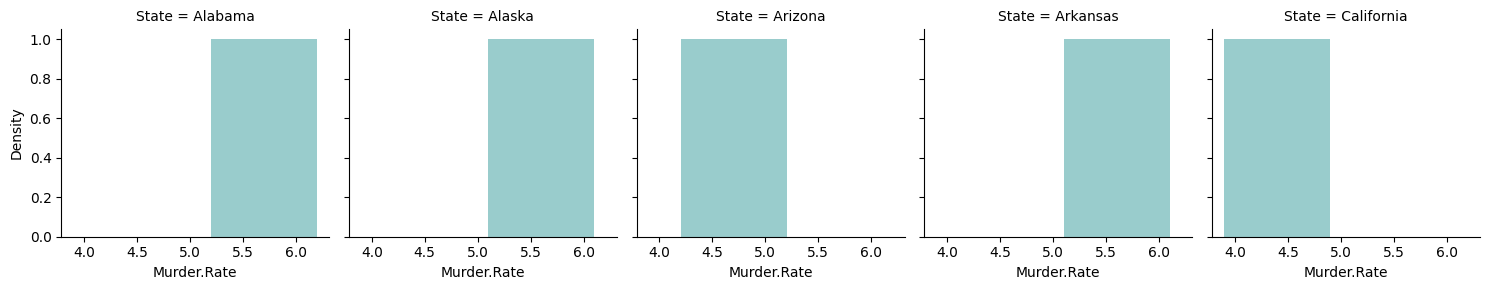

In [45]:
analisis=katzen.head()
g = sns.FacetGrid(analisis, col="State")
g.map(sns.distplot,"Murder.Rate", color = "teal")